<a href="https://colab.research.google.com/github/bilalahmedgb/handsonML/blob/main/Chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [26]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int) #Iris setosa

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [29]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

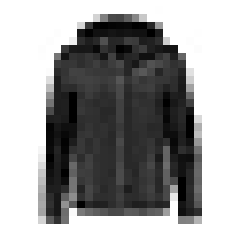

None

In [30]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
display(plt.show())

In [31]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [32]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [33]:
class_names[y_train[0]]

'Coat'

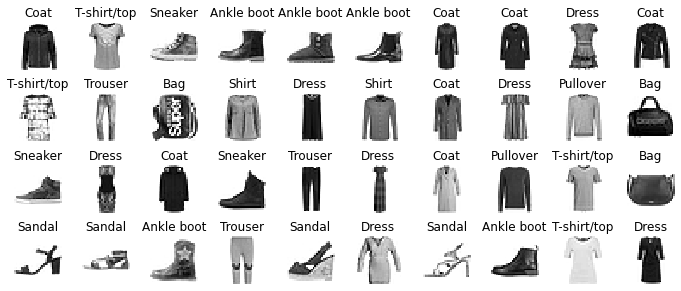

None

In [34]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
display(plt.show())

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

In [38]:
model.layers

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


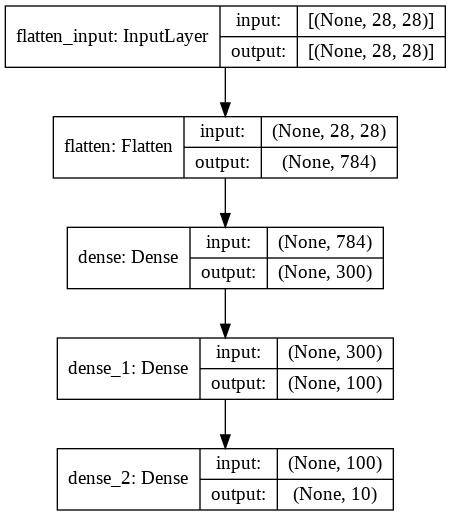

In [40]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [41]:
hidden1 = model.layers[1]

In [42]:
hidden1.name

'dense'

In [43]:
model.get_layer('dense') is hidden1

True

In [44]:
weights, biases = hidden1.get_weights()

In [45]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [46]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [47]:
#If we are not sure of the Input size, we can ignore, keras will wait till we build()
# model2 = keras.models.Sequential([
#   keras.layers.Dense('300', activation="relu"),
#   keras.layers.Dense('100', activation="relu"),
#   keras.layers.Dense('10', activation="softmax")
# ])

In [48]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [49]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 2ms/step - loss: 1.0187 - accuracy: 0.6805 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5028 - accuracy: 0.8262 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4483 - accuracy: 0.8424 - val_loss: 0.5279 - val_accuracy: 0.8008
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4207 - accuracy: 0.8530 - val_loss: 0.3917 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4060 - accuracy: 0.8586 - val_loss: 0.3742 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8674 - val_loss: 0.3715 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3652 - accuracy: 0.8709 - val_loss: 0.3610 - val_accuracy:

In [50]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [51]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [52]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [53]:
history.history

{'accuracy': [0.7643091082572937,
  0.8315636515617371,
  0.8456000089645386,
  0.8565818071365356,
  0.8622000217437744,
  0.8677272796630859,
  0.871436357498169,
  0.874854564666748,
  0.8789818286895752,
  0.8819817900657654,
  0.8839091062545776,
  0.8867272734642029,
  0.8892909288406372,
  0.8917818069458008,
  0.8939818143844604,
  0.8971999883651733,
  0.8976181745529175,
  0.9000181555747986,
  0.9022908806800842,
  0.9035817980766296,
  0.9052909016609192,
  0.9071817994117737,
  0.9083818197250366,
  0.9104727506637573,
  0.9124181866645813,
  0.9139999747276306,
  0.9158545732498169,
  0.9160727262496948,
  0.9183454513549805,
  0.9194545745849609],
 'loss': [0.7237027883529663,
  0.4842100441455841,
  0.4390987455844879,
  0.4122406244277954,
  0.39384883642196655,
  0.3751632571220398,
  0.36308398842811584,
  0.35165902972221375,
  0.3414646089076996,
  0.33198902010917664,
  0.324044793844223,
  0.31485337018966675,
  0.30790218710899353,
  0.3019029498100281,
  0.2944

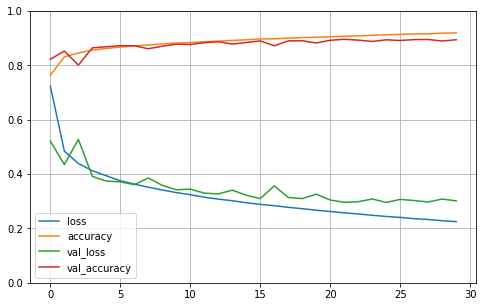

None

In [54]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) #gca gives the current axes, we are setting the Y axis range
display(plt.show())

In [55]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8838


[0.3358292877674103, 0.8838000297546387]

In [56]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [57]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [58]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [59]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [60]:
#Regression MLP

In [61]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full )

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [63]:
y_valid.shape

(3870,)

In [64]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] #to test the model
y_pred = model.predict(X_new)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.2270 - val_loss: 0.6806
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6066 - val_loss: 0.5710
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6332 - val_loss: 0.4964
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4747 - val_loss: 0.4785
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4391 - val_loss: 0.4615
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4368 - val_loss: 0.4553
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4267 - val_loss: 0.4433
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4165 - val_loss: 0.4446
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4189 - val_loss: 0.4326
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4096 - val_loss: 0.4306

In [65]:
y_pred

array([[0.5265773],
       [1.789429 ],
       [3.6217597]], dtype=float32)

In [66]:
#Complex Models using Funcitonal API

In [70]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

In [72]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_12[0][0]             

In [73]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.5528 - val_loss: 1.8897
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5564 - val_loss: 1.2710
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 3.4573 - val_loss: 33.7187
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 43.9395 - val_loss: 114.8945
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==========

In [74]:
#To pass multiple Inputs to different flow in the model

In [79]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [80]:
#Since there are two inputs to the Model, we are passing two inputs below

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 3.0690 - val_loss: 0.8608
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7970 - val_loss: 0.6731
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6540 - val_loss: 0.6210
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6001 - val_loss: 0.5885
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5586 - val_loss: 0.5646
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5528 - val_loss: 0.5501
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5273 - val_loss: 0.5370
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5131 - val_loss: 0.5279
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5196 - val_loss: 0.5205
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5042 - val_loss: 0.5147

In [81]:
y_pred

array([[0.575694 ],
       [1.8347062],
       [3.0409474]], dtype=float32)

In [82]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [83]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1]  ,optimizer=keras.optimizers.SGD(lr=1e-3))

In [84]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 3.5753 - output_loss: 3.4396 - aux_output_loss: 4.7962 - val_loss: 1.1994 - val_output_loss: 0.9384 - val_aux_output_loss: 3.5490
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 1.1400 - output_loss: 0.9023 - aux_output_loss: 3.2787 - val_loss: 0.8843 - val_output_loss: 0.7048 - val_aux_output_loss: 2.5003
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8534 - output_loss: 0.6872 - aux_output_loss: 2.3490 - val_loss: 0.7790 - val_output_loss: 0.6466 - val_aux_output_loss: 1.9704
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7444 - output_loss: 0.6199 - aux_output_loss: 1.8651 - val_loss: 0.7255 - val_output_loss: 0.6166 - val_aux_output_loss: 1.7054
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6907 - output_loss: 0.5864 - aux_output_loss: 1.6301 - val_loss: 0.6926 - val_output_loss: 0.5953 - val_aux_

In [86]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 2ms/step - loss: 0.5491 - output_loss: 0.4973 - aux_output_loss: 1.0149


In [88]:
y_pred_main

y_pred_aux

array([[1.4318697],
       [1.7698102],
       [2.211674 ]], dtype=float32)

In [89]:
#Saving and Restoring

In [90]:
model = keras.models.Sequential([
            keras.layers.Dense(30, activation="relu", input_shape=[8]),
            keras.layers.Dense(30, activation="relu"),
            keras.layers.Dense(1)
])

In [92]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.9764 - val_loss: 1.0726
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0507 - val_loss: 0.8088
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7914 - val_loss: 0.7308
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6894 - val_loss: 0.6826
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6550 - val_loss: 0.6468
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6335 - val_loss: 0.6205
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6069 - val_loss: 0.6015
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5795 - val_loss: 0.5850
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5743 - val_loss: 0.5722
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.5569


In [93]:
model.save("my_keras_model.h5")

In [94]:
model = keras.models.load_model("my_keras_model.h5")

In [95]:
model.predict(X_new)

array([[0.78717834],
       [1.3195046 ],
       [2.6677089 ]], dtype=float32)

In [98]:
model.save_weights("my_keras_weights.ckpt")

In [99]:
model.load_weights("my_keras_weights.ckpt")

In [100]:
#Callback during Training

In [101]:
keras.backend.clear_session()

In [102]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [104]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.6452 - val_loss: 0.7914
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7975 - val_loss: 0.7057
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6829 - val_loss: 0.6629
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6281
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6048 - val_loss: 0.5986
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5886 - val_loss: 0.5750
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5605 - val_loss: 0.5550
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5309 - val_loss: 0.5387
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5287 - val_loss: 0.5251
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.5058


In [105]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5081 - val_loss: 0.5057
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5079 - val_loss: 0.4962
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4755 - val_loss: 0.4894
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4692 - val_loss: 0.4857
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4585 - val_loss: 0.4785
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4657 - val_loss: 0.4754
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4571 - val_loss: 0.4705
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4494 - val_loss: 0.4671
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4571 - val_loss: 0.4639
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4494 - val_lo